<a href="https://colab.research.google.com/github/yuki-tamaribuchi/audio_lighting_rebuild/blob/feature/system_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Googleドライブから音源データをコピー
!cp drive/'My Drive'/piano_only_bpm120_original.wav /content/file

In [ ]:
from scipy.io import wavfile
from scipy.signal import resample
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import librosa
import librosa.display
np.set_printoptions(threshold=np.inf)

In [ ]:
librosa.version.show_versions()

INSTALLED VERSIONS
------------------
python: 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]

librosa: 0.6.3

audioread: 2.1.9
numpy: 1.18.5
scipy: 1.4.1
sklearn: 0.22.2.post1
joblib: 0.17.0
decorator: 4.4.2
six: 1.15.0
resampy: 0.2.2
numba: 0.48.0

numpydoc: None
sphinx: 1.8.5
sphinx_rtd_theme: None
sphinxcontrib.versioning: None
sphinx-gallery: None
pytest: 3.6.4
pytest-mpl: None
pytest-cov: None
matplotlib: 3.2.2


In [ ]:
#wavデータを読み込み
sr, data = wavfile.read('file')

#dtypeをnp.floatに変換
data=data.astype(np.float)

#左のみ
data=data[:,0]

In [ ]:
#リサンプリング前のデータ
ipd.Audio(data,rate=sr)

In [ ]:
#sr44100をcqtのhop_lengthである512の倍数44032にダウンサンプリング

#音源の秒数を計算
audio_time=len(data)/sr
print('Audio Time:',audio_time,'sec')

#リサンプルレートを指定
sr=44032

#リサンプリング
data=resample(data,int(sr*audio_time))

Audio Time: 6.0 sec


In [ ]:
#リサンプリング後のデータ
ipd.Audio(data,rate=sr)

In [ ]:
#hpss実行
h,p=librosa.effects.hpss(data)

In [ ]:
#hpss後のハーモニクスの音源データ
ipd.Audio(h,rate=sr)

In [ ]:
#CQT
C=librosa.cqt(y = h, sr = sr, sparsity=0.62)

#Chroma Cens
chroma_cens=librosa.feature.chroma_cens(C = C)

/usr/local/lib/python3.6/dist-packages/librosa/display.py:696: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


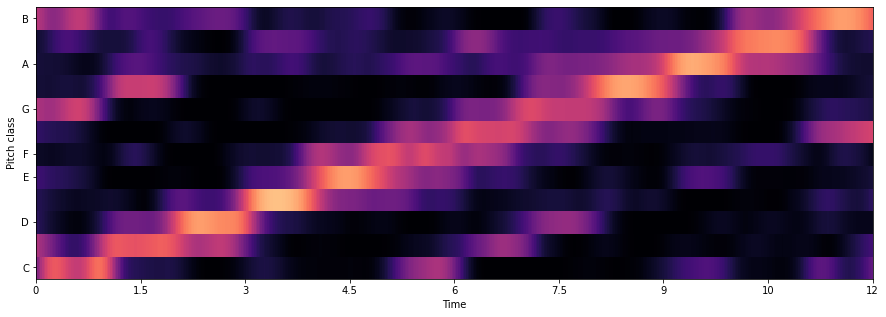

In [ ]:
#プロット
plt.figure(figsize=(15,5))
librosa.display.specshow(chroma_cens,x_axis='time',y_axis='chroma',vmin=0,vmax=1)

In [ ]:
#512*86=44032，86*6=516であるため516にクロップ
chroma_cens_cropped=chroma_cens[:,:516]

#chroma_censの配列長の計算
cens_length=len(chroma_cens_cropped[0,:])
print('Cens Length:',cens_length)


Cens Length: 516


In [ ]:
#予想される配列の作成
#0.5秒毎であるため43個毎に数値を上げて配列作成
expected_result=[]
x=0
for i in range(int(cens_length)):
  if i%43==0:
    if i==0:
      expected_result.append(x)
    else:
      x+=1
      expected_result.append(x)
  else:
    expected_result.append(x)

expected_result=np.array(expected_result)
print('Expected Result:\n',expected_result)

Expected Result:
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7

In [ ]:
#CQTによって検出された音階を配列化
result_argmax=[chroma_cens_cropped[:,i].argmax() for i in range(cens_length)]

result_argmax=np.array(result_argmax)

print('Result Argmax:\n',result_argmax)

Result Argmax:
 [11 11 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7  7
  7  7  7  7  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  

In [ ]:
#検出結果が合っていれば1，合っていなければ0で配列化
tf_result=[1 if result_argmax[i]==expected_result[i] else 0 for i in range(cens_length) ]
tf_result=np.array(tf_result)

In [ ]:
#平均，標準偏差
tf_result_mean=tf_result.mean()
tf_result_std=tf_result.std()

print('Mean:',tf_result_mean)
print('Std:',tf_result_std)

Mean: 0.9437984496124031
Std: 0.23031052108322653


In [ ]:
stacked=np.stack([expected_result,result_argmax,tf_result],axis=1)
print('Stacked:\n',stacked)

Stacked:
 [[ 0 11  0]
 [ 0 11  0]
 [ 0 11  0]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  7  0]
 [ 0  7  0]
 [ 0  7  0]
 [ 0  7  0]
 [ 0  7  0]
 [ 0  7  0]
 [ 0  7  0]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 [ 1  0  0]
 [ 1  0  0]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1  